## Exercise 1

### Question 1

Visualize the data to better understand how constitutional documents differ.
Create two data matrices for both the regular document-term frequency, and for the tf–idf weighted term frequency.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
p = pd.read_csv('constitution.csv')

In [3]:
p.head()

,country,year,preamble
0,afghanistan,2004,"In the name of Allah, the Most Beneficent, the..."
1,albania,1998,"We, the people of Albania, proud and aware of ..."
2,algeria,1989,"The Algerian people is a free people, decided ..."
3,andorra,1993,"The Andorran People, with full liberty and ind..."
4,angola,2010,"We, the people of Angola, through its lawful r..."


In [4]:
import re # regular expressions
import string # string manipulation
import nltk # natural language toolkit

In [5]:
# download stopwords: only need to run once
# nltk.download('stopwords')

# save and inspect stopwords
stopwords = nltk.corpus.stopwords.words('english')
# would is not included. Let's include.
stopwords.append('would')

In [6]:
# instantiate the Porter stemmer to stem the words
ps = nltk.PorterStemmer()

def preprocess_text(text):
    # make lower case
    text = text.lower()
    # remove punctuation
    text = "".join([word for word in text if word not in string.punctuation])
    # remove numbers 
    text = re.sub('[0-9]+', '', text)
    # create a list of individual tokens, removing whitespace
    tokens = re.split('\W+', text)
    # remove stopwords
    tokens = [word for word in tokens if word not in stopwords]
    # remove any empty strings associated with trailing spaces
    tokens = [word for word in tokens if word !='']
    # finally, stem each word
    tokens = [ps.stem(word) for word in tokens]
    return tokens

# apply function 
p['preamble_processed'] = p['preamble'].apply(preprocess_text)


In [7]:
# each element of the preamble_processed column is a list of tokens
p[['preamble', 'preamble_processed']].head()

,preamble,preamble_processed
0,"In the name of Allah, the Most Beneficent, the...","[name, allah, benefic, merci, prais, allah, ch..."
1,"We, the people of Albania, proud and aware of ...","[peopl, albania, proud, awar, histori, respons..."
2,"The Algerian people is a free people, decided ...","[algerian, peopl, free, peopl, decid, remain, ..."
3,"The Andorran People, with full liberty and ind...","[andorran, peopl, full, liberti, independ, exe..."
4,"We, the people of Angola, through its lawful r...","[peopl, angola, law, repres, legisl, nation, f..."


In [8]:
# regular document-term frequency
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=preprocess_text)

# transform the preamble column into a document-term matrix
dtm = count_vect.fit_transform(p['preamble'])

In [9]:
# the dtm is a sparse matrix
type(dtm)

scipy.sparse._csr.csr_matrix

In [10]:
# convert the sparse matrix to a dense matrix and store in a DataFrame
dtm_mat = pd.DataFrame(dtm.toarray(), columns=count_vect.get_feature_names_out())

dtm_mat.head()

,abandon,abdallah,abdel,abid,abil,abl,abli,abneg,abolish,aborigin,...,younger,youth,yugoslavia,zaghloul,zambia,zeal,zedong,zeledon,zimbabw,zionist
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# The tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=preprocess_text, norm='l2')
dtm_tfidf = tfidf_vect.fit_transform(p['preamble'])
dtm_tfidf_mat = pd.DataFrame(dtm_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

dtm_tfidf_mat.head()

,abandon,abdallah,abdel,abid,abil,abl,abli,abneg,abolish,aborigin,...,younger,youth,yugoslavia,zaghloul,zambia,zeal,zedong,zeledon,zimbabw,zionist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Let's find the 10 most important words for the preamble of Turkey
# get the index of Turkey
tr_index = p[p['country'] == 'turkey'].index.values.astype(int)[0]
dtm_tfidf_mat.iloc[tr_index,:].sort_values(ascending=False).head(10)

turkish       0.653263
nation        0.220551
absolut       0.193681
exist         0.144334
honour        0.133610
atatrk        0.130653
turkey        0.130653
requir        0.130426
reform        0.103857
motherland    0.103857
Name: 141, dtype: float64

For the both matrices (document-term frequency and tf-idf weighted term frequency)
visualize the preamble to the US Constitution with a word cloud.
How do the results differ between the two methods?

Text(0.5, 1.0, 'tfidf-TR')

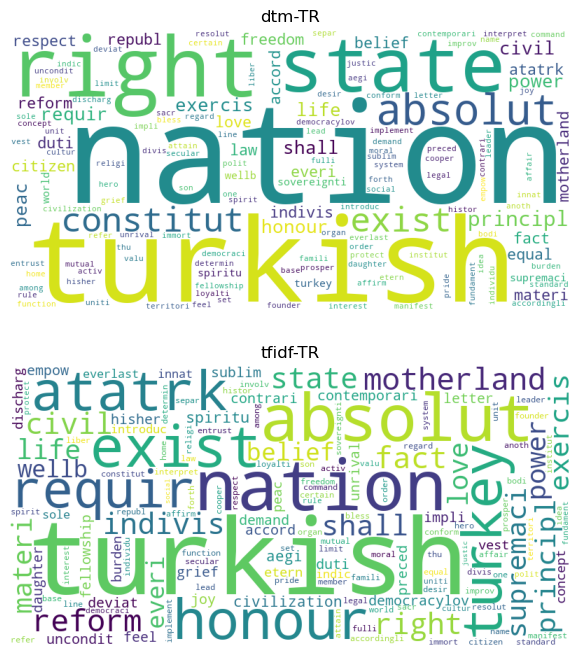

In [13]:
from wordcloud import WordCloud

# for dtm
dtm_tr = dtm_mat.iloc[tr_index,:]

wordcloud_dtm_tr = WordCloud(
    width=800, height=400, background_color ='white'
).generate_from_frequencies(dtm_tr)

# for tf-idf
tfidf_tr = dtm_tfidf_mat.iloc[tr_index,:]

wordcloud_tfidf_tr = WordCloud(
    width=800, height=400, background_color ='white'
).generate_from_frequencies(tfidf_tr)

# plot word clouds vertically
fig, axs = plt.subplots(2, 1, figsize=(8,8))

axs[0].imshow(wordcloud_dtm_tr)
axs[0].axis('off')
axs[0].set_title('dtm-TR')

axs[1].imshow(wordcloud_tfidf_tr)
axs[1].axis('off')
axs[1].set_title('tfidf-TR')

### Question 2

Apply the k-means algorithm to the rows of the tf–idf matrix and identify clusters of similar constitution preambles. 
Set the number of clusters to 5 and describe the results.

In [14]:
from sklearn.cluster import KMeans

k = 5
km_out = KMeans(n_clusters=k , n_init=1, random_state=42)
km_out.fit(dtm_tfidf_mat)

# check convergence
km_out.n_iter_

4

In [15]:
km_out.labels_

array([4, 4, 0, 2, 3, 0, 2, 2, 2, 3, 2, 3, 2, 4, 0, 1, 2, 4, 1, 2, 2, 2,
       1, 1, 3, 1, 1, 1, 1, 0, 2, 1, 1, 1, 3, 0, 4, 1, 0, 4, 4, 3, 0, 0,
       4, 0, 2, 2, 1, 2, 2, 4, 2, 2, 4, 0, 1, 0, 0, 3, 3, 2, 2, 2, 0, 4,
       0, 2, 2, 2, 4, 2, 0, 0, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 3, 2, 2, 2, 3, 0, 1, 2, 2, 2, 2, 0, 3, 4, 4, 0,
       3, 2, 1, 3, 0, 4, 2, 0, 1, 1, 2, 2, 4, 2, 3, 2, 2, 2, 4, 4, 3, 4,
       1, 2, 2, 2, 3, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 4, 2, 2, 0, 2, 0, 0,
       0], dtype=int32)

In [16]:
# create data frame from the cluster centers
centers = pd.DataFrame(km_out.cluster_centers_, 
                       columns=dtm_tfidf_mat.columns)

In [17]:
# see how center variable looks like
centers

,abandon,abdallah,abdel,abid,abil,abl,abli,abneg,abolish,aborigin,...,younger,youth,yugoslavia,zaghloul,zambia,zeal,zedong,zeledon,zimbabw,zionist
0,6.505213e-19,4.336809e-19,5.421011e-20,-8.673617e-19,1.454120e-02,1.150098e-03,-1.084202e-19,5.421011e-20,8.531034e-04,3.252607e-19,...,0.000000e+00,2.798082e-03,0.000000,5.421011e-20,1.584108e-02,0.000000e+00,2.939702e-03,3.520002e-03,5.050674e-03,1.084202e-19
1,5.777984e-03,2.168404e-19,2.710505e-20,-1.301043e-18,3.584044e-03,4.336809e-19,0.000000e+00,0.000000e+00,6.505213e-19,2.168404e-19,...,5.421011e-20,2.996585e-03,0.000000,2.710505e-20,-8.673617e-19,0.000000e+00,1.084202e-19,-1.084202e-19,-5.421011e-19,2.491632e-03
2,-4.336809e-19,2.335258e-03,1.626303e-19,1.928105e-03,1.577530e-03,8.488678e-04,2.067795e-03,7.589415e-19,1.324316e-03,2.308264e-03,...,8.277513e-04,2.168404e-18,0.001347,1.626303e-19,0.000000e+00,1.579099e-03,-7.589415e-19,-1.084202e-19,-6.505213e-19,-3.252607e-19
3,1.084202e-19,0.000000e+00,1.919430e-03,7.118141e-03,-4.336809e-19,8.933982e-03,4.336809e-19,3.876562e-03,5.513246e-03,-2.168404e-19,...,1.626303e-19,4.607287e-03,0.000000,1.919430e-03,0.000000e+00,1.084202e-19,1.084202e-19,-1.084202e-19,-3.252607e-19,-5.421011e-20
4,2.168404e-19,0.000000e+00,-5.421011e-20,5.570481e-03,-4.336809e-19,-2.168404e-19,2.168404e-19,0.000000e+00,4.336809e-19,-1.084202e-19,...,1.084202e-19,2.546760e-03,0.000000,-5.421011e-20,0.000000e+00,1.084202e-19,1.084202e-19,-2.168404e-19,-4.336809e-19,-1.084202e-19


In [18]:
# see cluster labels
km_out.labels_

array([4, 4, 0, 2, 3, 0, 2, 2, 2, 3, 2, 3, 2, 4, 0, 1, 2, 4, 1, 2, 2, 2,
       1, 1, 3, 1, 1, 1, 1, 0, 2, 1, 1, 1, 3, 0, 4, 1, 0, 4, 4, 3, 0, 0,
       4, 0, 2, 2, 1, 2, 2, 4, 2, 2, 4, 0, 1, 0, 0, 3, 3, 2, 2, 2, 0, 4,
       0, 2, 2, 2, 4, 2, 0, 0, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 3, 2, 2, 2, 3, 0, 1, 2, 2, 2, 2, 0, 3, 4, 4, 0,
       3, 2, 1, 3, 0, 4, 2, 0, 1, 1, 2, 2, 4, 2, 3, 2, 2, 2, 4, 4, 3, 4,
       1, 2, 2, 2, 3, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 4, 2, 2, 0, 2, 0, 0,
       0], dtype=int32)

In [19]:
# create 'cluster' column for 'p' dataframe so that we can know which preamble is in which cluster
# add + 1 to the cluster labels so that we can get rid of zeros
p['cluster'] = km_out.labels_ + 1
p.head()

,country,year,preamble,preamble_processed,cluster
0,afghanistan,2004,"In the name of Allah, the Most Beneficent, the...","[name, allah, benefic, merci, prais, allah, ch...",5
1,albania,1998,"We, the people of Albania, proud and aware of ...","[peopl, albania, proud, awar, histori, respons...",5
2,algeria,1989,"The Algerian people is a free people, decided ...","[algerian, peopl, free, peopl, decid, remain, ...",1
3,andorra,1993,"The Andorran People, with full liberty and ind...","[andorran, peopl, full, liberti, independ, exe...",3
4,angola,2010,"We, the people of Angola, through its lawful r...","[peopl, angola, law, repres, legisl, nation, f...",4


In [20]:
# store cluster numbers
clusters = np.arange(1, k+1)

In [21]:
# loop through the clusters and print the 10 most important words
for i in range(len(clusters)):
    print(f'CLUSTER {clusters[i]}')
    print('Top 10 words:')
    print(centers.iloc[i].sort_values(ascending=False).head(10))
    # store the names of countries associated with each cluster
    countries = p.loc[p['cluster']==clusters[i], 'country']
    print(f'countries: {list(countries)}')
    print('\n')

CLUSTER 1
Top 10 words:
nation       0.068103
peopl        0.061660
freedom      0.055886
right        0.055792
social       0.046627
struggl      0.046383
human        0.045629
free         0.045325
constitut    0.045042
person       0.043251
Name: 0, dtype: float64
countries: ['algeria', 'antigua_and_barbuda', 'belize', 'china', 'cuba', 'dominica', 'equatorial_guinea', 'eritrea', 'ethiopia', 'guatemala', 'guinea-bissau', 'guyana', 'iran_islamic_republic_of', 'ireland', "korea_democratic_people's_republic_of", 'korea_republic_of', 'nicaragua', 'papua_new_guinea', 'poland', 'saint_lucia', 'sao_tome_and_principe', 'trinidad_and_tobago', 'tunisia', 'uganda', 'vanuatu', 'viet_nam', 'zambia', 'zimbabwe']


CLUSTER 2
Top 10 words:
right      0.133698
african    0.092634
man        0.084626
state      0.084283
nation     0.082747
charter    0.078571
peopl      0.072607
intern     0.067682
polit      0.065419
integr     0.058047
Name: 1, dtype: float64
countries: ['benin', 'bosnia_and_herzego

### Question 3

See whether new foreign constitutions are more similar to the US Constitution preamble than the existing ones through cosine similarity.
Identify the 5 constitutions whose preambles most resemble that of the US Constitution.

In [22]:
# get the row of the US preamble
us_preamble_idx = p[p['country'] == 'united_states_of_america'].index.values.astype(int)[0]
us_dtm_mat = dtm_mat.iloc[us_preamble_idx, :]

In [23]:
# loop that computes cosine similarity of each countries' preambles to us preamble

from numpy.linalg import norm

cos_similarity_to_us_preamble = []

for row in range(len(dtm_mat)):
    country_dtm_mat = dtm_mat.iloc[row, :]
    # compute cosine similarity for 1-d vector
    # cosine = np.dot(A,B)/(norm(A)*norm(B))
    cosine = np.dot(us_dtm_mat,country_dtm_mat)/(norm(country_dtm_mat)*norm(country_dtm_mat))
    cos_similarity_to_us_preamble.append(cosine)
    

In [24]:
p['cos_similarity_to_us_preamble'] = cos_similarity_to_us_preamble

# 5 constitutions whose preambles most resemble that of the US Constitution.
p.sort_values(['cos_similarity_to_us_preamble'], ascending=False).iloc[:6 , [0,-1]]

,country,cos_similarity_to_us_preamble
148,united_states_of_america,1.000000
6,argentina,0.304348
108,philippines,0.300000
69,kazakhstan,0.216216
50,georgia,0.207547
21,bulgaria,0.196429


### Question 4

Examine the influence of the US Constitution on other constitutions over time. Calculate, for every 10 years from 1960 until 2010, the average of cosine similarity
between the US Constitution and the constitutions that were created during the previous decade.

In [25]:
# loop that selects preambles from 'p' dataset according to each decade,
# and computes cosine similarity of selected values to us preamble

dec_cos_similarity_to_us_preamble = []

for year in list(range(1960, 2020, 10)):
    if year != 2010:
        decade_idx = (p['year'] > year) & (p['year'] <= year + 10)
    # compute cosine similarity for different dimensional arrays
    # cosine = np.dot(A,B)/(norm(A, axis=1)*norm(B))
        cosine = np.dot(dtm_mat[decade_idx], us_dtm_mat)/(norm(dtm_mat[decade_idx], axis=1)*norm(us_dtm_mat))
        dec_cos_similarity_to_us_preamble.append(cosine)

dec_cos_similarity_to_us_preamble
        

[array([0.08024208, 0.08138963, 0.12472624, 0.20513217]),
 array([0.06482037, 0.17200824, 0.15064783, 0.19567429, 0.117504  ,
        0.05875445, 0.        , 0.04409739, 0.18402654, 0.15602546,
        0.19544078, 0.09629473, 0.1573779 , 0.1628251 , 0.16205093,
        0.13937141, 0.14730969, 0.10578879, 0.07276069, 0.12056344,
        0.22647954, 0.2757801 , 0.15460561, 0.06628317, 0.23489478,
        0.16502459, 0.18981415]),
 array([0.23915555, 0.13758602, 0.15428817, 0.18845714, 0.2227832 ,
        0.19908467, 0.21967735, 0.13747973, 0.16412763, 0.20498002,
        0.25870666, 0.12604604, 0.19978981, 0.16015553, 0.12643043,
        0.32539569, 0.10890171, 0.10958925, 0.12135188, 0.19352884]),
 array([0.15059532, 0.12818406, 0.14002801, 0.34595268, 0.10786762,
        0.12854362, 0.25209209, 0.2048897 , 0.03537746, 0.16206289,
        0.11562432, 0.11554229, 0.19354922, 0.07767356, 0.1698089 ,
        0.24926362, 0.14269545, 0.12907289, 0.17338176, 0.25912857,
        0.2207963 , 0.

In [26]:
# take average of cosine values according to decades

avg_cos_similarity_to_us_preamble = []

for i in dec_cos_similarity_to_us_preamble:
    average = i.sum(axis=0) / len(i)
    avg_cos_similarity_to_us_preamble.append(average)

avg_cos_similarity_to_us_preamble

[0.12287253107605765,
 0.14134162818436466,
 0.17987576509441577,
 0.16172752329743822,
 0.16572017358318744]

Plot the result. See how the similarity changes over time.

<Axes: xlabel='years', ylabel='values'>

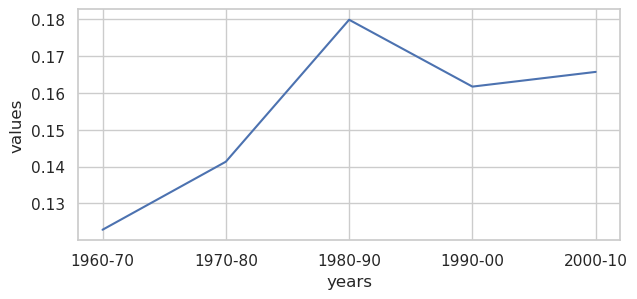

In [27]:
# crate a dataframe with years and cosine values
data = pd.DataFrame({'values' : avg_cos_similarity_to_us_preamble,
                    'years': ['1960-70', '1970-80', '1980-90', '1990-00', '2000-10']})

# plotting the numbers
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 3))
sns.lineplot(data=data, x='years', y='values')

### Question 5